In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/next (2).csv')
df.head()

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,BHK,...,Dining Table,Washing Machine,Exhaust Fan,Chimney,Light,Sofa,Fan,Bed,furnishing_type,area
0,maa bhagwati residency,45.0,5000.0,2.0,2.0,1.0,4.0,West,Relatively New,2,...,0,0,0,0,0,0,0,0,0,0.009000
1,Apna Enclave,50.0,7692.0,2.0,2.0,1.0,1.0,West,Old Property,2,...,0,0,0,0,0,0,0,0,2,0.006500
2,Tulsiani Easy in Homes,40.0,6722.0,2.0,2.0,3.0,12.0,NaN,New Property,2,...,0,0,0,0,0,0,0,0,0,0.005951
3,Smart World Orchard,147.0,12250.0,2.0,2.0,2.0,2.0,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0.012000
4,Parkwood Westend,70.0,5204.0,2.0,2.0,3.0,5.0,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0.013451


In [ ]:
import pandas as pd

threshold = 0.5
null_threshold = len(df) * threshold
df = df.dropna(thresh=null_threshold, axis=1)
print(df.shape)


(3013, 66)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   society             3013 non-null   object 
 1   price               2993 non-null   float64
 2   price_per_sqft      3011 non-null   float64
 3   bedRoom             2994 non-null   float64
 4   bathroom            2994 non-null   float64
 5   balcony             2994 non-null   float64
 6   floorNum            2993 non-null   float64
 7   facing              2122 non-null   object 
 8   agePossession       3013 non-null   object 
 9   BHK                 3013 non-null   int64  
 10  Location            3013 non-null   object 
 11  Total Floors        2993 non-null   float64
 12  Servant_Room        3013 non-null   int64  
 13  Study_Room          3013 non-null   int64  
 14  Pooja_Room          3013 non-null   int64  
 15  Store_Room          3013 non-null   int64  
 16  Carpet

In [ ]:
df.isna().sum().sort_values(ascending=False)

Carpet_Area           1195
Super_BuiltUp_Area    1080
facing                 891
swimming               425
visitor_parking        425
                      ... 
Location                 0
Servant_Room             0
luxury_score             0
Study_Room               0
society                  0
Length: 66, dtype: int64

In [ ]:
df.shape

(3013, 66)

In [ ]:
df[["society","Location","agePossession"]].isna().sum()

society          0
Location         0
agePossession    0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


object_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


for col in object_columns:
    df[col] = le.fit_transform(df[col])



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   society             3013 non-null   int64  
 1   price               2993 non-null   float64
 2   price_per_sqft      3011 non-null   float64
 3   bedRoom             2994 non-null   float64
 4   bathroom            2994 non-null   float64
 5   balcony             2994 non-null   float64
 6   floorNum            2993 non-null   float64
 7   facing              3013 non-null   int64  
 8   agePossession       3013 non-null   int64  
 9   BHK                 3013 non-null   int64  
 10  Location            3013 non-null   int64  
 11  Total Floors        2993 non-null   float64
 12  Servant_Room        3013 non-null   int64  
 13  Study_Room          3013 non-null   int64  
 14  Pooja_Room          3013 non-null   int64  
 15  Store_Room          3013 non-null   int64  
 16  Carpet

In [ ]:
df.corr()

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,BHK,...,Dining Table,Washing Machine,Exhaust Fan,Chimney,Light,Sofa,Fan,Bed,furnishing_type,area
society,1.000000,-0.128499,-0.096247,-0.077275,-0.107363,-0.161289,-0.118954,-0.024355,0.030957,-0.077246,...,-0.031556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.097949,0.014006
price,-0.128499,1.000000,0.611498,0.553189,0.593220,0.303302,0.198120,0.021925,-0.041700,0.553189,...,0.030847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206959,-0.011804
price_per_sqft,-0.096247,0.611498,1.000000,0.143761,0.180538,0.102679,0.080158,-0.021835,0.051119,0.144564,...,0.022254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090409,-0.055125
bedRoom,-0.077275,0.553189,0.143761,1.000000,0.830656,0.401074,0.095022,0.052580,-0.070405,1.000000,...,0.049615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174880,-0.015644
bathroom,-0.107363,0.593220,0.180538,0.830656,1.000000,0.426322,0.123496,0.077498,-0.059016,0.830656,...,0.028314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208662,-0.012084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sofa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing_type,-0.097949,0.206959,0.090409,0.174880,0.208662,0.178019,0.063756,0.067076,-0.135113,0.174678,...,0.101279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.009970


In [ ]:
num_features = len(df.columns)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)

fig, axs = plt.subplots(num_rows, 4, figsize=(50, num_rows * 7.5))
count = 0
cols = df.columns.to_list()

for i in range(num_rows):
    for j in range(4):
        if count < num_features:
            sns.histplot(df[cols[count]], ax=axs[i, j], kde=True)
            axs[i, j].set_title(cols[count], fontsize=30)
            count += 1
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df = df.dropna(subset=['price'])



In [ ]:
df.isna().sum()

society            0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
                  ..
Sofa               0
Fan                0
Bed                0
furnishing_type    0
area               0
Length: 66, dtype: int64

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

train_df = df[df['Super_BuiltUp_Area'].notna()]
test_df = df[df['Super_BuiltUp_Area'].isna()]

if not test_df.empty:
    X_train = train_df[['price']]
    y_train = train_df['Super_BuiltUp_Area']

    model = LinearRegression()
    model.fit(X_train, y_train)

    if not test_df.empty:
        X_test = test_df[['price']]
        y_pred = model.predict(X_test)

        test_df['Super_BuiltUp_Area'] = y_pred

    df = pd.concat([train_df, test_df])

<ipython-input-14-62ca99a0480d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Super_BuiltUp_Area'] = y_pred


In [ ]:
columns_to_fill = df.columns[df.isna().any()].tolist()

for col in columns_to_fill:
    unique_values = df[col].dropna().unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        fill_value = df[col].mode()[0]
    else:
        fill_value = df[col].mean()
    df[col].fillna(fill_value, inplace=True)
df.isna().sum()

society            0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
                  ..
Sofa               0
Fan                0
Bed                0
furnishing_type    0
area               0
Length: 66, dtype: int64

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

In [ ]:
X = df.drop(columns=['price']).values
y = df['price'].values
sc=StandardScaler()
X=sc.fit_transform(X)
# y=sc.fit_transform(y.reshape(-1,1))
# y=y.reshape(-1)
df_edit=df

In [ ]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'agePossession', 'BHK', 'Location',
       'Total Floors', 'Servant_Room', 'Study_Room', 'Pooja_Room',
       'Store_Room', 'Carpet_Area', 'Super_BuiltUp_Area', 'piped_gas',
       'waste_disposal', 'shopping_centre', 'intercom', 'power_backup',
       'central_ac', 'wifi', 'garden', 'community', 'staff', 'water_storage',
       'visitor_parking', 'lift', 'vaastu', 'security', 'swimming', 'gym',
       'luxury_score', 'Hospital', 'Mall', 'Mandir/Church', 'ATM', 'Bank',
       'School', 'College', 'Metro Station', 'Airport', 'Hotel', 'AC',
       'Wardrobe', 'Microwave', 'Fridge', 'Stove', 'Curtains',
       'Water Purifier', 'TV', 'Modular Kitchen', 'Geyser', 'Dining Table',
       'Washing Machine', 'Exhaust Fan', 'Chimney', 'Light', 'Sofa', 'Fan',
       'Bed', 'furnishing_type', 'area'],
      dtype='object')

In [ ]:
corr_matrix=df.corr()
corr = np.array(corr_matrix)[1]
cols= df_edit.columns
columns_to_drop = []

for i in range(len(cols)):
    print(cols[i], "-->", np.round(corr[i], 3))
    if np.isnan(corr[i]) or np.abs(corr[i]) < 0.1:
        columns_to_drop.append(cols[i])

df_edit.drop(columns_to_drop, axis=1, inplace=True)
X_edit = df_edit.drop(columns=['price']).values
y_edit= df_edit['price'].values


society --> -0.128
price --> 1.0
price_per_sqft --> 0.611
bedRoom --> 0.553
bathroom --> 0.593
balcony --> 0.303
floorNum --> 0.198
facing --> 0.022
agePossession --> -0.042
BHK --> 0.553
Location --> -0.176
Total Floors --> 0.33
Servant_Room --> 0.421
Study_Room --> 0.066
Pooja_Room --> 0.118
Store_Room --> 0.058
Carpet_Area --> -0.013
Super_BuiltUp_Area --> 0.86
piped_gas --> 0.147
waste_disposal --> 0.106
shopping_centre --> 0.03
intercom --> 0.156
power_backup --> 0.077
central_ac --> 0.144
wifi --> 0.126
garden --> 0.006
community --> 0.102
staff --> 0.014
water_storage --> 0.02
visitor_parking --> 0.03
lift --> 0.041
vaastu --> 0.061
security --> 0.029
swimming --> 0.119
gym --> 0.09
luxury_score --> 0.144
Hospital --> 0.134
Mall --> 0.076
Mandir/Church --> 0.024
ATM --> 0.032
Bank --> -0.019
School --> 0.099
College --> 0.113
Metro Station --> 0.281
Airport --> 0.117
Hotel --> 0.157
AC --> 0.369
Wardrobe --> 0.233
Microwave --> 0.199
Fridge --> 0.134
Stove --> 0.222
Curtains -->

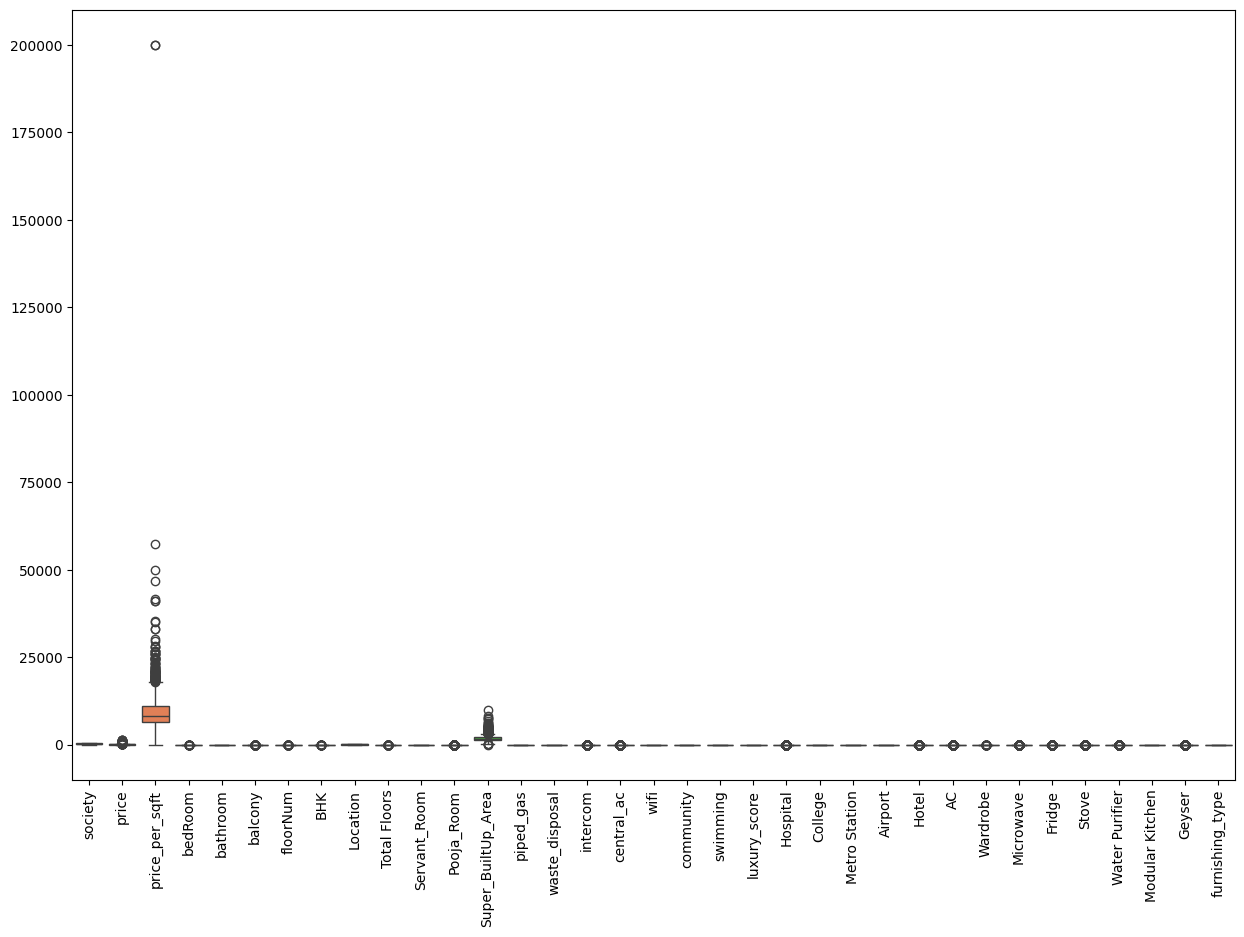

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Super_BuiltUp_Area']=np.log(df['Super_BuiltUp_Area'])
df_edit['Super_BuiltUp_Area']=np.log(df_edit['Super_BuiltUp_Area'])
df['price_per_sqft']=np.log(df['price_per_sqft'])
df_edit['price_per_sqft']=np.log(df_edit['price_per_sqft'])

In [ ]:
import pandas as pd

def remove_outliers_iqr(df):
    df = pd.DataFrame(df)

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[~((df < lower_bound.values) | (df > upper_bound.values)).any(axis=1)]

df = remove_outliers_iqr(X)
df_edit = remove_outliers_iqr(X_edit)


In [ ]:
df.shape

(241, 65)

In [ ]:
df_edit.shape

(808, 34)

# **LINEAR REGRESSION**

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=33)
me_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
r2_list = []

me_scores_edit = []
mae_scores_edit = []
mse_scores_edit = []
rmse_scores_edit = []
r2_list_edit = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_edit_train, X_edit_test = X_edit[train_index], X_edit[test_index]
    y_edit_train, y_edit_test = y_edit[train_index], y_edit[test_index]

    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, y_train)
    y_pred = linear_regressor.predict(X_test)

    me = np.mean(y_test - y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    me_scores.append(me)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_list.append(r2)

    linear_regressor.fit(X_edit_train, y_edit_train)
    y_edit_pred = linear_regressor.predict(X_edit_test)

    me_edit = np.mean(y_edit_test - y_edit_pred)
    mae_edit = mean_absolute_error(y_edit_test, y_edit_pred)
    mse_edit = mean_squared_error(y_edit_test, y_edit_pred)
    rmse_edit = np.sqrt(mse_edit)
    r2_edit = r2_score(y_edit_test, y_edit_pred)

    me_scores_edit.append(me_edit)
    mae_scores_edit.append(mae_edit)
    mse_scores_edit.append(mse_edit)
    rmse_scores_edit.append(rmse_edit)
    r2_list_edit.append(r2_edit)

print("Metrics for Original Features (X):")
print(f"Mean Error (ME): {np.mean(me_scores)}")
print(f"Mean Absolute Error (MAE): {np.mean(mae_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Mean Squared Error (MSE): {np.mean(mse_scores)}")
print(f"R-squared: {np.mean(r2_list)}")

print("\nMetrics for Edited Features (X_edit):")
print(f"Mean Error (ME): {np.mean(me_scores_edit)}")
print(f"Mean Absolute Error (MAE): {np.mean(mae_scores_edit)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores_edit)}")
print(f"Mean Squared Error (MSE): {np.mean(mse_scores_edit)}")
print(f"R-squared: {np.mean(r2_list_edit)}")


Metrics for Original Features (X):
Mean Error (ME): -0.06499362664859488
Mean Absolute Error (MAE): 35.11445924882109
Root Mean Squared Error (RMSE): 57.8699555399733
Mean Squared Error (MSE): 3417.469961269113
R-squared: 0.8246954131247571

Metrics for Edited Features (X_edit):
Mean Error (ME): -0.16306728976640597
Mean Absolute Error (MAE): 35.07807779524822
Root Mean Squared Error (RMSE): 57.570406138095365
Mean Squared Error (MSE): 3386.879956398183
R-squared: 0.8272142184884888



#  **KNN MODEL**



Best k value for original features (X) based on KNN Score: 2
Metrics for k = 2 (original features):
Mean Absolute Error (MAE): 44.25340250845425
Mean Squared Error (MSE): 6450.235621108974
Root Mean Squared Error (RMSE): 80.04905769595247
R-squared (R2): 0.6696822957788761
KNN Score: 0.6696822957788761


Best k value for edited features (X_edit) based on KNN Score: 3
Metrics for k = 3 (edited features):
Mean Absolute Error (MAE): 24.184723705246387
Mean Squared Error (MSE): 2758.0606975403925
Root Mean Squared Error (RMSE): 52.06998710512297
R-squared (R2): 0.8595711140595804
KNN Score: 0.8595711140595804


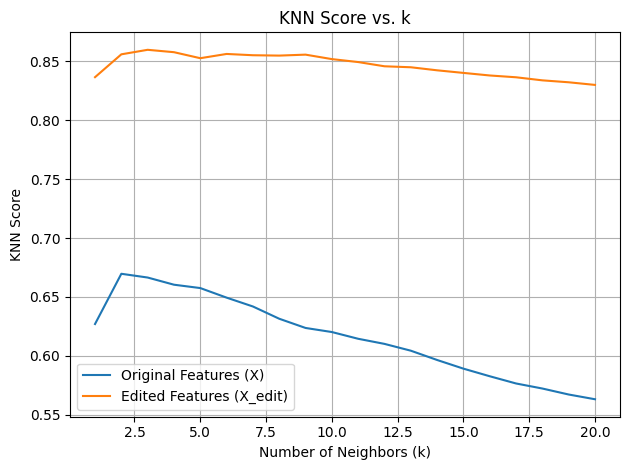

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
k_values = range(1, 21)


rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

scaler = StandardScaler()

all_metrics = {k: {'mae': [], 'mse': [], 'rmse': [], 'r2': [], 'knn_score': [],
                   'mae_edit': [], 'mse_edit': [], 'rmse_edit': [], 'r2_edit': [], 'knn_score_edit': []}
               for k in k_values}

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model_edit = KNeighborsRegressor(n_neighbors=k)

    for train_index, test_index in rkf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_edit_train, X_edit_test = X_edit[train_index], X_edit[test_index]

        knn_model.fit(X_train, y_train)
        knn_model_edit.fit(X_edit_train, y_train)

        y_pred = knn_model.predict(X_test)
        y_pred_edit = knn_model_edit.predict(X_edit_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        knn_score = knn_model.score(X_test, y_test)

        all_metrics[k]['mae'].append(mae)
        all_metrics[k]['mse'].append(mse)
        all_metrics[k]['rmse'].append(rmse)
        all_metrics[k]['r2'].append(r2)
        all_metrics[k]['knn_score'].append(knn_score)

        mae_edit = mean_absolute_error(y_test, y_pred_edit)
        mse_edit = mean_squared_error(y_test, y_pred_edit)
        rmse_edit = np.sqrt(mse_edit)
        r2_edit = r2_score(y_test, y_pred_edit)
        knn_score_edit = knn_model_edit.score(X_edit_test, y_test)

        all_metrics[k]['mae_edit'].append(mae_edit)
        all_metrics[k]['mse_edit'].append(mse_edit)
        all_metrics[k]['rmse_edit'].append(rmse_edit)
        all_metrics[k]['r2_edit'].append(r2_edit)
        all_metrics[k]['knn_score_edit'].append(knn_score_edit)

average_metrics = {k: {metric: np.mean(values) for metric, values in metrics.items()} for k, metrics in all_metrics.items()}

best_k_original = max(k_values, key=lambda k: average_metrics[k]['knn_score'])
best_k_edit = max(k_values, key=lambda k: average_metrics[k]['knn_score_edit'])

print(f"Best k value for original features (X) based on KNN Score: {best_k_original}")
print(f"Metrics for k = {best_k_original} (original features):")
print(f"Mean Absolute Error (MAE): {average_metrics[best_k_original]['mae']}")
print(f"Mean Squared Error (MSE): {average_metrics[best_k_original]['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics[best_k_original]['rmse']}")
print(f"R-squared (R2): {average_metrics[best_k_original]['r2']}")
print(f"KNN Score: {average_metrics[best_k_original]['knn_score']}")

print("\n")

print(f"Best k value for edited features (X_edit) based on KNN Score: {best_k_edit}")
print(f"Metrics for k = {best_k_edit} (edited features):")
print(f"Mean Absolute Error (MAE): {average_metrics[best_k_edit]['mae_edit']}")
print(f"Mean Squared Error (MSE): {average_metrics[best_k_edit]['mse_edit']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics[best_k_edit]['rmse_edit']}")
print(f"R-squared (R2): {average_metrics[best_k_edit]['r2_edit']}")
print(f"KNN Score: {average_metrics[best_k_edit]['knn_score_edit']}")



plt.plot(k_values, [average_metrics[k]['knn_score'] for k in k_values], label='Original Features (X)')
plt.plot(k_values, [average_metrics[k]['knn_score_edit'] for k in k_values], label='Edited Features (X_edit)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('KNN Score')
plt.legend()
plt.title('KNN Score vs. k')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


n_splits = 5
n_repeats = 3

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

scaler = StandardScaler()

rf_model = RandomForestRegressor(random_state=42)
rf_model_edit = RandomForestRegressor(random_state=42)

metrics = {
    'mae': [], 'mse': [], 'rmse': [], 'r2': [], 'rf_score': [],
    'mae_edit': [], 'mse_edit': [], 'rmse_edit': [], 'r2_edit': [], 'rf_score_edit': []
}

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_edit_train, X_edit_test = X_edit[train_index], X_edit[test_index]

    rf_model.fit(X_train, y_train)
    rf_model_edit.fit(X_edit_train, y_train)

    y_pred = rf_model.predict(X_test)
    y_pred_edit = rf_model_edit.predict(X_edit_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rf_score = rf_model.score(X_test, y_test)

    metrics['mae'].append(mae)
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r2'].append(r2)
    metrics['rf_score'].append(rf_score)

    mae_edit = mean_absolute_error(y_test, y_pred_edit)
    mse_edit = mean_squared_error(y_test, y_pred_edit)
    rmse_edit = np.sqrt(mse_edit)
    r2_edit = r2_score(y_test, y_pred_edit)
    rf_score_edit = rf_model_edit.score(X_edit_test, y_test)

    metrics['mae_edit'].append(mae_edit)
    metrics['mse_edit'].append(mse_edit)
    metrics['rmse_edit'].append(rmse_edit)
    metrics['r2_edit'].append(r2_edit)
    metrics['rf_score_edit'].append(rf_score_edit)

average_metrics = {k: np.mean(v) for k, v in metrics.items()}

print("Average Metrics for Original Features (X):")
print(f"Mean Absolute Error (MAE): {average_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse']}")
print(f"R-squared (R2): {average_metrics['r2']}")
print(f"Random Forest Score: {average_metrics['rf_score']}")

print("\nAverage Metrics for Edited Features (X_edit):")
print(f"Mean Absolute Error (MAE): {average_metrics['mae_edit']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse_edit']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse_edit']}")
print(f"R-squared (R2): {average_metrics['r2_edit']}")
print(f"Random Forest Score: {average_metrics['rf_score_edit']}")


Average Metrics for Original Features (X):
Mean Absolute Error (MAE): 6.8725887853408585
Mean Squared Error (MSE): 633.5207937031706
Root Mean Squared Error (RMSE): 24.461384051245943
R-squared (R2): 0.9679069764470278
Random Forest Score: 0.9679069764470278

Average Metrics for Edited Features (X_edit):
Mean Absolute Error (MAE): 15.244803133111112
Mean Squared Error (MSE): 1215.9270229675758
Root Mean Squared Error (RMSE): 34.49120234633826
R-squared (R2): 0.9378256930828733
Random Forest Score: 0.9378256930828733


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

scaler = StandardScaler()

kernel = 'linear'
svr_model = SVR(kernel=kernel)
svr_model_edit = SVR(kernel=kernel)

metrics = {
    'mae': [], 'mse': [], 'rmse': [], 'r2': [], 'svr_score': [],
    'mae_edit': [], 'mse_edit': [], 'rmse_edit': [], 'r2_edit': [], 'svr_score_edit': []
}

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_edit_train, X_edit_test = X_edit[train_index], X_edit[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_edit_train_scaled = scaler.fit_transform(X_edit_train)
    X_edit_test_scaled = scaler.transform(X_edit_test)

    svr_model.fit(X_train_scaled, y_train)
    svr_model_edit.fit(X_edit_train_scaled, y_train)

    y_pred = svr_model.predict(X_test_scaled)
    y_pred_edit = svr_model_edit.predict(X_edit_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    svr_score = svr_model.score(X_test_scaled, y_test)

    metrics['mae'].append(mae)
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r2'].append(r2)
    metrics['svr_score'].append(svr_score)

    mae_edit = mean_absolute_error(y_test, y_pred_edit)
    mse_edit = mean_squared_error(y_test, y_pred_edit)
    rmse_edit = np.sqrt(mse_edit)
    r2_edit = r2_score(y_test, y_pred_edit)
    svr_score_edit = svr_model_edit.score(X_edit_test_scaled, y_test)

    metrics['mae_edit'].append(mae_edit)
    metrics['mse_edit'].append(mse_edit)
    metrics['rmse_edit'].append(rmse_edit)
    metrics['r2_edit'].append(r2_edit)
    metrics['svr_score_edit'].append(svr_score_edit)

average_metrics = {k: np.round(np.mean(v),4) for k, v in metrics.items()}

print("Metrics for Original Features (X) with Linear Kernel:")
print(f"Mean Absolute Error (MAE): {average_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse']}")
print(f"R-squared (R2): {average_metrics['r2']}")
print(f"SVR Score: {average_metrics['svr_score']}")

print("\nMetrics for Edited Features (X_edit) with Linear Kernel:")
print(f"Mean Absolute Error (MAE): {average_metrics['mae_edit']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse_edit']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse_edit']}")
print(f"R-squared (R2): {average_metrics['r2_edit']}")
print(f"SVR Score: {average_metrics['svr_score_edit']}")


Metrics for Original Features (X) with Linear Kernel:
Mean Absolute Error (MAE): 30.2281
Mean Squared Error (MSE): 4646.8166
Root Mean Squared Error (RMSE): 66.5759
R-squared (R2): 0.7691
SVR Score: 0.7691

Metrics for Edited Features (X_edit) with Linear Kernel:
Mean Absolute Error (MAE): 30.2625
Mean Squared Error (MSE): 4594.2727
Root Mean Squared Error (RMSE): 66.2364
R-squared (R2): 0.7716
SVR Score: 0.7716
